In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt

In [2]:
import os
import tweepy

CONSUMER_KEY="07AQR8EwMu4tnN7eNrWlcCImg"
CONSUMER_SECRET="RNaSs12y2nSVsu5fPWL7BBBuG8XOhtsU3ku13fZ9Kz3ubpJvSN"
OAUTH_TOKEN="865566989087100930-GV6hLVrQCJGj7KCNuaiZIlFpbOjXzmT"
OAUTH_TOKEN_SECRET="HG0D2MeU6g11hVbzz5lA665iZVlXbUsS0NBWG7Twe0r1u"

auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(OAUTH_TOKEN, OAUTH_TOKEN_SECRET)
api = tweepy.API(auth)

/Users/mobeets/anaconda/lib/python2.7/site-packages/cryptography/hazmat/primitives/constant_time.py:26: CryptographyDeprecationWarning: Support for your Python version is deprecated. The next version of cryptography will remove support. Please upgrade to a release (2.7.7+) that supports hmac.compare_digest as soon as possible.
  utils.PersistentlyDeprecated2018,


In [3]:
all_tweets = []
last_id = None
first_id = 1139637304929243136
c = 0
while len(all_tweets) == 0 or all_tweets[-1].id != 1139637304929243136:
    c += 1
    tweets = api.user_timeline(screen_name='tweeprint', count=20, max_id=last_id)
    last_id = tweets[-1].id
    all_tweets += tweets
    print c, len(all_tweets), all_tweets[-1].created_at


1 20 2020-01-24 01:25:24
2 40 2020-01-18 16:53:07
3 60 2020-01-09 19:48:13
4 80 2019-12-24 18:15:18
5 100 2019-12-04 19:30:59
6 120 2019-11-19 02:23:08
7 140 2019-10-25 12:13:15
8 160 2019-10-01 09:57:30
9 180 2019-09-04 13:45:24
10 200 2019-08-08 15:54:13
11 220 2019-07-15 23:48:44
12 240 2019-07-04 15:17:10
13 260 2019-06-28 15:38:26
14 280 2019-06-21 21:05:10
15 300 2019-06-18 19:05:53
16 320 2019-06-16 15:58:09
17 340 2019-06-14 21:11:29
18 353 2019-06-14 20:54:41


In [4]:
ids = []
unique_tweets = []
for tweet in all_tweets:
    if tweet.id not in ids:
        unique_tweets.append(tweet)
        ids.append(tweet.id)
print len(unique_tweets)

336


In [5]:
with open('tweets_20200201.pickle', 'wb') as f:
    pickle.dump(unique_tweets, f)


In [6]:
dts = [t.retweeted_status.created_at for t in unique_tweets if hasattr(t, 'retweeted_status')]
dts = sorted(dts)

In [7]:
plt.style.use('ggplot')

In [69]:
'{}:{:03}'.format(2019,12)

'2019:012'

{'2019-02': 6, '2019-03': 5, '2019-01': 3, '2019-06': 47, '2019-07': 37, '2019-04': 4, '2019-05': 12, '2019-08': 19, '2019-09': 20, '2020-02': 1, '2020-01': 63, '2019-11': 28, '2019-12': 25, '2019-10': 27}
297


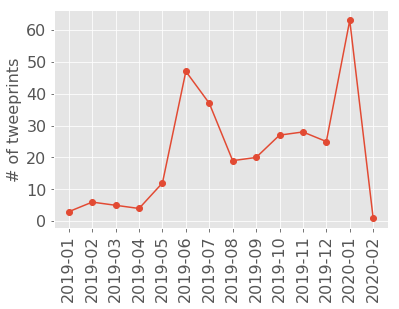

In [17]:
# counts per year/month
cs = {}
for dt in dts:
    if dt.year < 2019:
        continue
    key = '{}-{:02}'.format(dt.year, dt.month)
    if key not in cs:
        cs[key] = 0
    cs[key] += 1
bins = list(cs.keys())
print(cs)
print(sum(list(cs.values())))

xs = sorted(bins)
ys = [cs[x] for x in xs]

# cs = np.bincount(ms)
fntsz = 16
plt.plot(xs, ys, 'o-')
plt.xticks(fontsize=fntsz, rotation=90)
plt.yticks(fontsize=fntsz)
plt.ylabel('# of tweeprints', fontsize=fntsz)
plt.show()

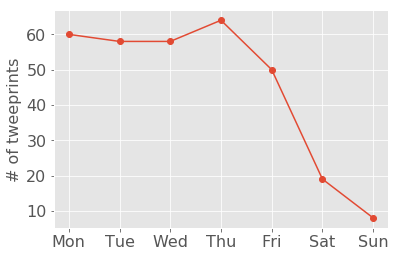

In [9]:
ds = [d.weekday() for d in dts]
bins = range(0, max(ds)+1)
cs = np.bincount(ds)
fntsz = 16
plt.plot(bins, cs, 'o-')
plt.xticks(bins, ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], fontsize=fntsz)
plt.yticks(fontsize=fntsz)
# plt.xlabel('month', fontsize=fntsz)
plt.ylabel('# of tweeprints', fontsize=fntsz)
plt.show()


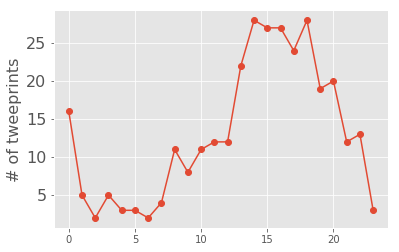

In [10]:
hs = [d.hour for d in dts]
bins = range(0, max(hs)+1)
cs = np.bincount(hs)
fntsz = 16
plt.plot(bins, cs, 'o-')
# plt.xticks(bins, ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], fontsize=fntsz)
plt.yticks(fontsize=fntsz)
# plt.xlabel('month', fontsize=fntsz)
plt.ylabel('# of tweeprints', fontsize=fntsz)
plt.show()

In [12]:
rts = [t.retweeted_status for t in unique_tweets if hasattr(t, 'retweeted_status')]
print len(rts)

317


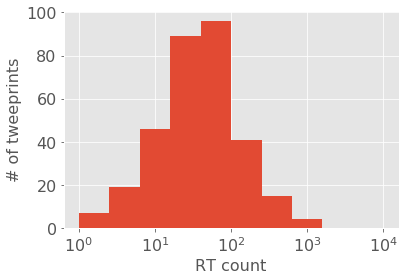

In [13]:
fs = np.array([t.retweet_count for t in rts])
fs = np.log10(fs[fs > 0])
xs = np.linspace(0,4,11)
bs = np.unique([int(x) for x in xs])
cs = plt.hist(fs, bins=xs)
fntsz = 16
plt.xlabel('RT count', fontsize=fntsz)
plt.xticks(bs, ['$10^{{{}}}$'.format(x) for x in bs], fontsize=fntsz)
plt.yticks(fontsize=fntsz)
plt.ylabel('# of tweeprints', fontsize=fntsz)
# plt.gca().axis('equal')
plt.show()


0.13541853191892864
3.0710526315789473
[-2 -1  0]


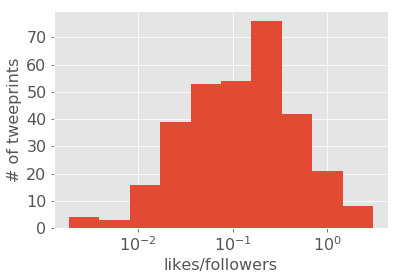

In [14]:
fs = np.array([1.0*t.favorite_count/t.user.followers_count for t in rts])
fs = np.log10(fs[fs > 0])
print np.power(10, np.median(fs))
print np.power(10, fs.max())
# print sorted(fs)
# fs = fs - fs.min()
# xs = np.linspace(0,0.5,11)
# bs = np.unique([int(x) for x in xs])
cs = plt.hist(fs)#, bins=xs)
# print cs
fntsz = 16
plt.xlabel('likes/followers', fontsize=fntsz)

bins = cs[1]
bins = np.unique([int(x) for x in bins])
print(bins)

plt.xticks(bins, ['$10^{{{}}}$'.format(x) for x in bins], fontsize=fntsz)
plt.yticks(fontsize=fntsz)
plt.ylabel('# of tweeprints', fontsize=fntsz)
# plt.gca().axis('equal')
plt.show()

In [83]:
fs = np.array([t.favorite_count for t in tweeprints])
print 'LIKES: mean={:0.2f}, median={:0.2f}, max={:0.2f}'.format(fs.mean(), np.median(fs), np.max(fs))
print sorted(fs, reverse=True)[:10]
print np.median(sorted(fs, reverse=True)[:10])

fs = np.array([t.retweet_count for t in tweeprints])
print 'RTS: mean={:0.2f}, median={:0.2f}, max={:0.2f}'.format(fs.mean(), np.median(fs), np.max(fs))

NameError: name 'tweeprints' is not defined

In [84]:
ts = sorted(rts, key=lambda t: t.favorite_count, reverse=True)
print ('--------------')
print 'MOST LIKED'
print ('--------------')
for i, t in enumerate(ts[:10]):
    print ('      ')
    print '     {} ({} followers, {} likes) '.format(i, t.user.followers_count, t.favorite_count) + t.text

ts = sorted(rts, key=lambda t: t.retweet_count, reverse=True)
print ('--------------')
print 'MOST RETWEETED'
print ('--------------')
for i, t in enumerate(ts[:10]):
    print ('      ')
    print '     {} ({} followers, {} RTs) '.format(i, t.user.followers_count, t.retweet_count) + t.text
    
ts = sorted(rts, key=lambda t: 1.0*t.favorite_count/t.user.followers_count, reverse=True)
print ('--------------')
print 'MOST LIKES/FOLLOWERS'
print ('--------------')
for i, t in enumerate(ts[:10]):
    print ('      ')
    print '     {} ({} followers, {} likes) '.format(i, t.user.followers_count, t.favorite_count) + t.text

# 400, 7k, 70k, 37k, 34k, 7k, 3k, 800*, 3k*, 70k


--------------
MOST LIKED
--------------
      
     0 (72300 followers, 2354 likes) Weight Agnostic Neural Networks 🦎

Inspired by precocial species in biology, we set out to search for neural net ar… https://t.co/KAbZOw2Pz8
      
     1 (3467 followers, 2063 likes) Story time! Single neurons in the brain can’t be depended on for reliable information. Here are some neurons from o… https://t.co/KE43xHzU33
      
     2 (793 followers, 1810 likes) A story of a Cortical Neuron as a Deep Artificial Neural Net:

1) Neurons in the brain are bombarded with massive s… https://t.co/dbdQmoVwrV
      
     3 (3064 followers, 1442 likes) Social networks can distort decision making and produce undemocratic outcomes, our latest study… https://t.co/EycEzzSYDS
      
     4 (7112 followers, 1386 likes) 💥🎉 FINALLY! Our paper is out! 💥🎉 @CellCellPress We discovered that the nervous system of C.elegans transmits inform… https://t.co/zK37f0rgdL
      
     5 (37280 followers, 1338 likes) Just posted @bi

/Users/mobeets/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: RuntimeWarning: divide by zero encountered in log10


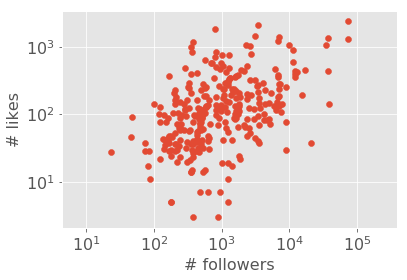

In [85]:
xs = np.array([x.user.followers_count for x in rts])
ys = np.array([x.favorite_count for x in rts])
# ys = np.array([x.retweet_count for x in rts])
xs = np.log10(xs); ys = np.log10(ys)
plt.scatter(xs, ys)

xst = range(1,9)
plt.xticks(xst, ['$10^{{{0}}}$'.format(x) for x in xst], fontsize=fntsz)
yst = range(0,9)
plt.yticks(yst, ['$10^{}$'.format(x) for x in yst], fontsize=fntsz)

plt.xlabel('# followers', fontsize=fntsz)
plt.ylabel('# likes', fontsize=fntsz)
plt.gca().axis('equal')
plt.show()


In [260]:
ts = sorted([1.0*t.favorite_count/t.user.followers_count for t in rts])
ts = np.array(ts)

# print np.sum([t for t in ])

print np.mean(ts)
print (ts > 1).sum()

0.27677886641883775
13


In [88]:
from unidecode import unidecode
tweeprints = [t.retweeted_status for t in unique_tweets if hasattr(t, 'retweeted_status')]
for t in tweeprints:
    id = t.id
    dt = t.created_at
    txt = unidecode(t.text).replace('\n',' ')
    url = 'http' + txt.split('http')[-1]
    likes = t.favorite_count
    rts = t.retweet_count
    user = t.user.screen_name
    followers = t.user.followers_count
    row = [id, dt, likes, rts, user, followers, 1.0*likes/followers, url, txt]
    print ','.join(['"{}"'.format(r) for r in row])
    

"1115903411139088384","2019-04-10 09:04:40","377","156","micahgallen","6895","0.054677302393","https://t.co/uHtAewpV6g","What does the synthetic frog's heart tell it's Bayesian brain? Read our new pre-print "In the Body's Eye: The Compu... https://t.co/uHtAewpV6g"
"1220744422738014210","2020-01-24 16:25:25","42","12","AlkisMH","144","0.291666666667","https://t.co/LnG4cSRXi0","Our latest work with @adrianhaith and @blamlab is finally out on biorxiv! Here, we tackle the question: by which me... https://t.co/LnG4cSRXi0"
"1220292368806510593","2020-01-23 10:29:07","3","1","kkilteni_neuro","370","0.00810810810811","https://t.co/P27RGZggiP","@BrainSelf @SfNJournals @MSCActions #tweeprint (1/n) We know that self-generated touch feels less intense and less... https://t.co/P27RGZggiP"
"1220381873945313285","2020-01-23 16:24:47","64","23","TheCharleyWu","482","0.132780082988","https://t.co/pYhzGgbVuB","Recent findings suggest the brain uses domain-general encoding to structure experiences based 

In [289]:
print dir(tweeprints[0])
print tweeprints[0].id_str
print tweeprints[0].text.split()[-1]

['__class__', '__delattr__', '__dict__', '__doc__', '__eq__', '__format__', '__getattribute__', '__getstate__', '__hash__', '__init__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_api', '_json', 'author', 'contributors', 'coordinates', 'created_at', 'destroy', 'entities', 'favorite', 'favorite_count', 'favorited', 'geo', 'id', 'id_str', 'in_reply_to_screen_name', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'parse', 'parse_list', 'place', 'possibly_sensitive', 'retweet', 'retweet_count', 'retweeted', 'retweets', 'source', 'source_url', 'text', 'truncated', 'user']
1207348895854006272
https://t.co/tBFiGwRcUc


251


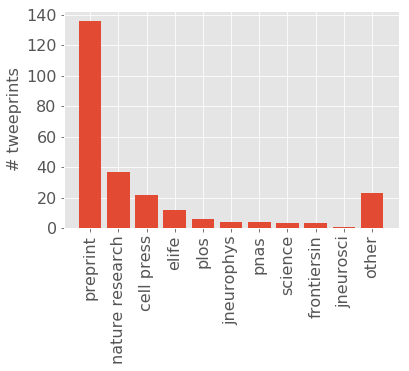

In [255]:
from collections import OrderedDict 

journals = OrderedDict()
journals['preprint'] = 136
journals['nature research'] = 37
journals['cell press'] = 22
journals['elife'] = 12
journals['plos'] = 6
journals['jneurophys'] = 4
journals['pnas'] = 4
journals['science'] = 3
journals['frontiersin'] = 3
journals['jneurosci'] = 1
journals['other'] = 23

print(np.array(journals.values()).sum())

xs = list(journals.keys())
ys = list(journals.values())
plt.bar(range(len(xs)), ys)
plt.xticks(range(len(xs)), xs, fontsize=fntsz, rotation=90)
plt.yticks(fontsize=fntsz)
plt.ylabel('# tweeprints', fontsize=fntsz)
plt.show()
# 136 *rxiv (93 bio, 38 arxiv, 4 psyarxiv, 1 medarxiv)
# 37 nature (12 communications, 10 neuro, 7 nature, 2 human beh, 1 protocols, 1 scientific reports)
# 22 cell (12 neuron, 5 current bio, 5 cell)
# 12 elife
# 6 plos
# 4 physiology
# 4 pnas
# 3 sciencedirect
# 3 science
# 3 frontiersin
# 1 jneurosci
# (21 other)


In [121]:

query = "#tweeprint"
max_tweets = 10
matches = []
for status in tweepy.Cursor(api.search, q=query + ' -filter:retweets', count=max_tweets, tweet_mode='extended').items(max_tweets):
    # can add max_id= to only get tweets since a given id
    if not hasattr(status, 'retweeted_status'):
        matches.append(status)

In [5]:
print(matches)
for tweet in matches:
    print tweet.full_text

[]


In [6]:
tweet = matches[0]
print tweet.full_text
print tweet.id
print tweet.id_str
print tweet.user.screen_name
print tweet.in_reply_to_status_id_str

IndexError: list index out of range

In [55]:
tweet = matches[0]
replies = []
for subtweet in tweepy.Cursor(api.search,q='from: ' + tweet.user.screen_name + ' to:' + tweet.user.screen_name + ' -filter:retweets', since_id=tweet.id, result_type='recent', timeout=999999).items(20):
    if subtweet.in_reply_to_status_id_str is not None and not hasattr(subtweet, 'retweeted_status'):
      if True:#(subtweet.in_reply_to_status_id_str==tweet.id_str):
        replies.append(subtweet)


In [56]:
for rep in replies:
    print rep.text


We found that aberrant sensorimotor functional connectivity seemed to be dependent on the corticospinal tract wirin… https://t.co/BVBg3YAVck


In [61]:
dir(tweet)

['__class__',
 '__delattr__',
 '__dict__',
 '__doc__',
 '__eq__',
 '__format__',
 '__getattribute__',
 '__getstate__',
 '__hash__',
 '__init__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_api',
 '_json',
 'author',
 'contributors',
 'coordinates',
 'created_at',
 'destroy',
 'display_text_range',
 'entities',
 'extended_entities',
 'favorite',
 'favorite_count',
 'favorited',
 'full_text',
 'geo',
 'id',
 'id_str',
 'in_reply_to_screen_name',
 'in_reply_to_status_id',
 'in_reply_to_status_id_str',
 'in_reply_to_user_id',
 'in_reply_to_user_id_str',
 'is_quote_status',
 'lang',
 'metadata',
 'parse',
 'parse_list',
 'place',
 'possibly_sensitive',
 'retweet',
 'retweet_count',
 'retweeted',
 'retweets',
 'source',
 'source_url',
 'truncated',
 'user']

In [65]:
tweet.entities['urls']

[{u'display_url': u'rdcu.be/bFu8D',
  u'expanded_url': u'https://rdcu.be/bFu8D',
  u'indices': [221, 244],
  u'url': u'https://t.co/NnJhTMobqt'}]

In [85]:
tw = api.get_status(1139639165040156674)

In [72]:
dir(tw)

['__class__',
 '__delattr__',
 '__dict__',
 '__doc__',
 '__eq__',
 '__format__',
 '__getattribute__',
 '__getstate__',
 '__hash__',
 '__init__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_api',
 '_json',
 'author',
 'contributors',
 'coordinates',
 'created_at',
 'destroy',
 'entities',
 'favorite',
 'favorite_count',
 'favorited',
 'geo',
 'id',
 'id_str',
 'in_reply_to_screen_name',
 'in_reply_to_status_id',
 'in_reply_to_status_id_str',
 'in_reply_to_user_id',
 'in_reply_to_user_id_str',
 'is_quote_status',
 'lang',
 'parse',
 'parse_list',
 'place',
 'possibly_sensitive',
 'possibly_sensitive_appealable',
 'quoted_status',
 'quoted_status_id',
 'quoted_status_id_str',
 'retweet',
 'retweet_count',
 'retweeted',
 'retweets',
 'source',
 'source_url',
 'text',
 'truncated',
 'user']

In [82]:
tw.entities['urls']

[{u'display_url': u'twitter.com/MarthaBagnall/\u2026',
  u'expanded_url': u'https://twitter.com/MarthaBagnall/status/1124479123982835714',
  u'indices': [70, 93],
  u'url': u'https://t.co/1Vy6NdeDiR'}]

In [83]:
urls = [url for url in tweet.entities['urls'] if 'twitter' not in url['display_url']]

In [84]:
urls

[{u'display_url': u'rdcu.be/bFu8D',
  u'expanded_url': u'https://rdcu.be/bFu8D',
  u'indices': [221, 244],
  u'url': u'https://t.co/NnJhTMobqt'}]

In [86]:
tw.text

u'RT @parrell: Our new paper on computational modeling of speech motor control is up on bioRxiv (https://t.co/KLfzAp9lzk). We present details\u2026'

In [97]:
[str(tw.created_at), tw.user.screen_name, tw.id, tw.text]

['2019-06-14 21:02:05',
 u'crisimmar',
 1139639165040156674,
 u'RT @parrell: Our new paper on computational modeling of speech motor control is up on bioRxiv (https://t.co/KLfzAp9lzk). We present details\u2026']

In [102]:
dir(tw)

['__class__',
 '__delattr__',
 '__dict__',
 '__doc__',
 '__eq__',
 '__format__',
 '__getattribute__',
 '__getstate__',
 '__hash__',
 '__init__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_api',
 '_json',
 'author',
 'contributors',
 'coordinates',
 'created_at',
 'destroy',
 'entities',
 'favorite',
 'favorite_count',
 'favorited',
 'geo',
 'id',
 'id_str',
 'in_reply_to_screen_name',
 'in_reply_to_status_id',
 'in_reply_to_status_id_str',
 'in_reply_to_user_id',
 'in_reply_to_user_id_str',
 'is_quote_status',
 'lang',
 'parse',
 'parse_list',
 'place',
 'possibly_sensitive',
 'possibly_sensitive_appealable',
 'retweet',
 'retweet_count',
 'retweeted',
 'retweeted_status',
 'retweets',
 'source',
 'source_url',
 'text',
 'truncated',
 'user']

In [111]:
'{}/{}/status/{}'.format(tw.source_url, tw.user.screen_name, tw.id)

'http://twitter.com/tweeprint/status/1139639165040156674'

In [108]:
t2 = api.get_status(tw.id)

In [112]:
tw.id

1139639165040156674